### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [126]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [127]:
#1
dataset = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
dataset.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [128]:
#2
dataset.info()
#conclusion
#dari hasil ini ada 10 kolom, data memiliki 6194 baris dengan indeks dari 0 hingga 6193, memiliki 4 tipe data yaitu int64, float64, object dan bool
# dtypes menunjukkan jenis data dari setiap kolom, non-null artinya tidak ada data yang bernilai kosong, namun ada beberapa data bernilai kosong
# kolom race dan admission memiliki nilai yg kosong/hilang

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [129]:
#3a
admission_count = dataset['admission'].value_counts(dropna=False)
print(admission_count)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [130]:
#3b
race_count = dataset['race'].value_counts(dropna=False)
print(race_count)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [131]:
#4
dataset['admission'].fillna('deny', inplace=True)
dataset['race'].fillna('Other', inplace=True)

<ipython-input-131-ea78396c97da>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['admission'].fillna('deny', inplace=True)
<ipython-input-131-ea78396c97da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

5. recheck missing value

In [132]:
#5
dataset.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [133]:
# 6
# Drop the 'application_id' column
dataset = dataset.drop(columns=['application_id'])

7. show describe column and conclude what the insight is from that column

In [134]:
#7
dataset.describe()

#conclusion
# berdasarkan hasil dapat dilihat jumlah data sebanyak 6194 untuk setiap kolom
# GPA rata-rata adalah 3.250, GMAT adalah 651.09, work_exp adalah 5.0169. ,
# standart deviasi dari GPA adalah 0.5, GMAT adalah 49.294 dan work_exp adalah 1.0324
# untuk nilai terendah GPA adalah 2.65, GMAT adalah 570.0 , work_exp adalah 1.0
# 25% GPA dibawah 3.105, GMAT dibawah 610.0, work_exp dibawah 4.0
# 50% GPA dari data memiliki GPA di atas 3.25, dan setengah lainnya di bawah 3.25, GMAT GMAT adalah 650.0, work_exp 5.0
# 75% GPA di atas 3.350,  GMAT di atas 680.0, work_exp 6.0
# max GPA tertinggi adalah 3.770, GMAT tertinggi 780.0, dan work_exp 9.0

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

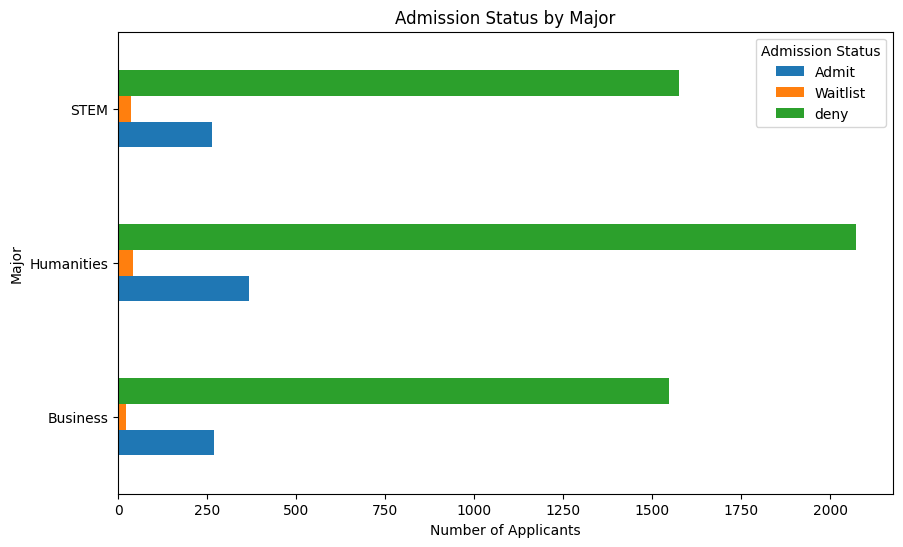

In [135]:
#8
admission_by_major = dataset.groupby(['major','admission'])['admission'].count().unstack()
admission_by_major.plot (kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

# dari hasil gambar dapat dilihat jika mahasiswa dari major Humanities banyak yang ditolak
# namun juga mahasiswa dari Humanities banyak yang masuk kedalam waiting list daripada jurusan lain
# mahasiwa jurusan Humanities juga banyak diterima
# sedangkan mahasiswa dari STEM dan Business banyak mahasiswa yang ditolak dan waiting list memiliki hasil yang mirip
# untuk mahasiswa STEM lebih banyak yang masuk kedalam waiting list daripada mahasiswa Business nnamun tidak lebih banyak dari Humanities

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

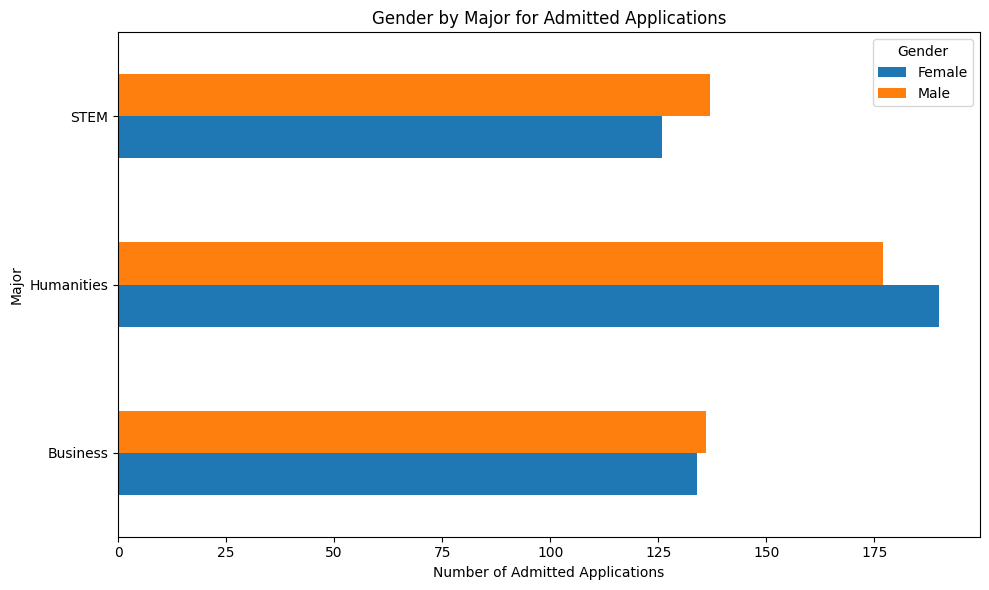

In [136]:
#9
admitted_df = dataset[dataset['admission'] == 'Admit']
count_admitted_gender_by_major = admitted_df.groupby(['major', 'gender'])['gender'].count().unstack()
count_admitted_gender_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Gender by Major for Admitted Applications')
plt.xlabel('Number of Admitted Applications')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
# dari hasil gender dapat dilihat jika mahasiswa Humanities banyak mahasiswa perempuan yang diterima daripada mahasiswa laki-laki yaitu sekitar > 175
# untuk STEM lebih banyak mahasiswa pria daripada perempuan
# dan untuk business juga banyak mahasiswa pria yang diterima daripada perempuan

10. create your own insightful visualization and explain it in at least 2 sentences

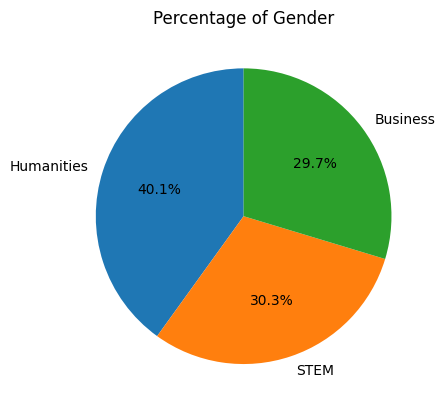

In [137]:
#10
gender_counts = dataset['major'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Gender')
plt.show()

# dari hasil visuailisasi dapat dilihat jika major Humanities memiliki persentasi paling tinggi daripada major lain
# mahasiswa Humanities hampir mencapai 50% dengan persentasi 40.1% dan Business memiliki persentasi paling rendah yaitu sekitar 29.7%
# mahasiswa STEM berada di pertengahan persentase yaitu sekitar 30.3%

11. create your own insightful visualization and explain it in at least 2 sentences

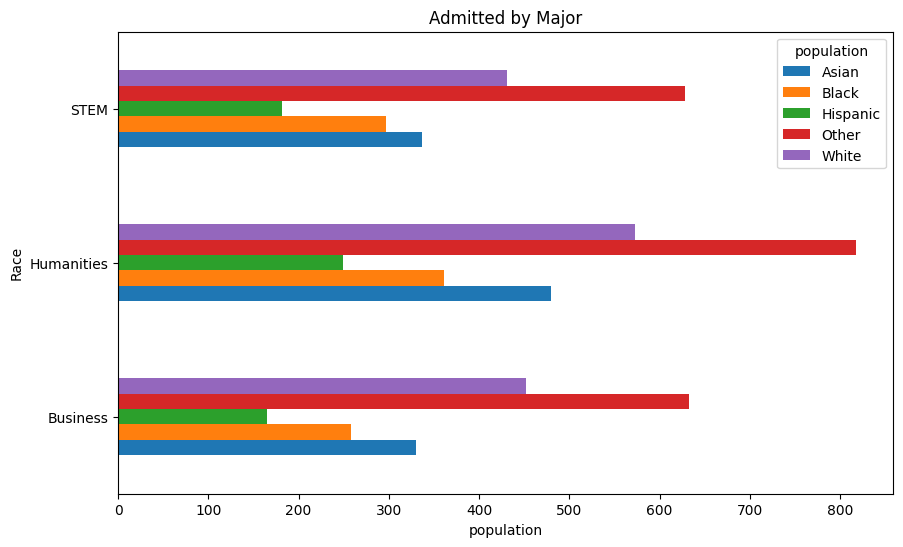

In [138]:
#11
count_type_by_quality = dataset.groupby(['major','race'])['race'].count().unstack()
count_type_by_quality.plot (kind='barh',
figsize=(10,6))
plt.title('Admitted by Major')
plt.xlabel('population')
plt.ylabel('Race')
plt.legend(title='population')
plt.show()

# dari hasil visualisasi dapat dilihat jika major Humanities memiliki jumlah ras yang paling beragam daripada jurusan lain
# major Humanities banyak yang diterima memiliki ras kulit putih dan other, dimana artinya banyak ras yang belum teridentifikasi maka disebutkan menjadi other
# major Humanities juga banyak ras Asian daripada jurusan lain
# major STEM memiliki sebagian besar mahasiswa yang diterima berasal dari kategori other dan kulit putih, dengan jumlah yang lebih sedikit untuk ras Asia dan ras lainnya
# untuk major Business memiliki jumlah mahasiswa keterima banyak di other dan kulit putih, paling sedikit ras Hispanic

12. encode categorical columns and display the results

In [139]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['gender'] = encoder.fit_transform(dataset['gender'])
dataset['international'] = encoder.fit_transform(dataset['international'])
dataset['major'] = encoder.fit_transform(dataset['major'])
dataset['race'] = encoder.fit_transform(dataset['race'])
dataset['work_exp'] = encoder.fit_transform(dataset['work_exp'])
dataset['work_industry'] = encoder.fit_transform(dataset['work_industry'])

dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,3,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [140]:
#12b
#encode y
dataset['admission'] = encoder.fit_transform(dataset['admission'])
dataset.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,2
2,0,1,3.30,0,3,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,2
4,1,0,3.35,2,2,590.0,4,1,2


13. create a heatmap to see the correlation and explain the conclusion

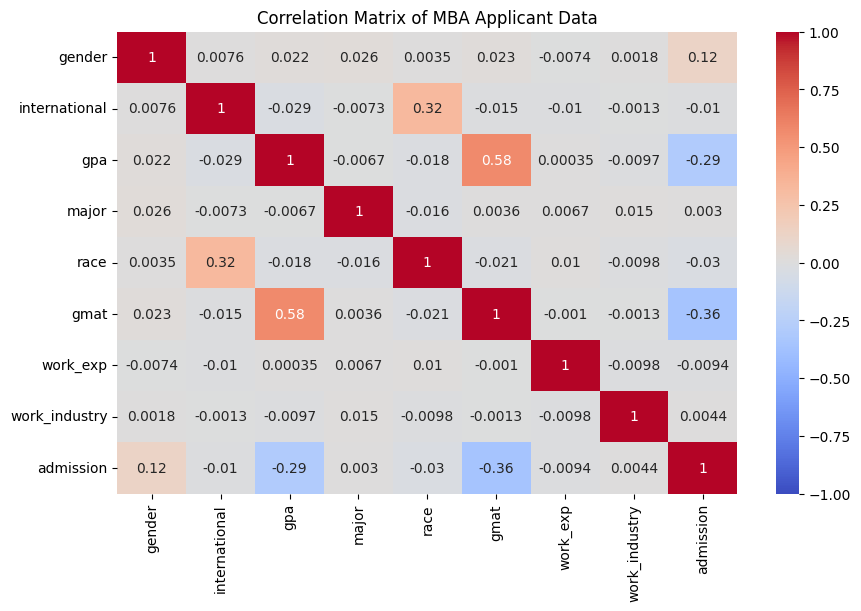

In [141]:
#13
import seaborn as sns
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()

# dari hasil heatmap Terdapat korelasi positif yang cukup signifikan antara GPA dan GMAT sebesar 0.58, yang menunjukkan bahwa pelamar dengan skor GMAT lebih tinggi cenderung memiliki nilai GPA yang lebih baik.
# GPA memiliki korelasi negatif yang cukup kuat dengan variabel admission sebesar -0.29, mengindikasikan bahwa pelamar dengan GPA yang lebih rendah cenderung lebih sering diterima dibandingkan yang memiliki GPA lebih tinggi.
# Korelasi negatif moderat sebesar -0.36 ditemukan antara GMAT dan admission, menunjukkan bahwa pelamar dengan skor GMAT lebih rendah memiliki kemungkinan diterima yang lebih besar.
# Race dan International menunjukkan korelasi tinggi sebesar 0.71, yang mengindikasikan adanya hubungan yang kuat antara status internasional dengan ras tertentu, misalnya, pelamar internasional mungkin lebih sering berasal dari kelompok ras tertentu.
# Korelasi antara variabel lain, seperti gender, major, dan work_exp, relatif rendah (di bawah 0.1), menandakan bahwa variabel-variabel ini tidak memiliki hubungan yang kuat dengan variabel lain dalam dataset ini.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [142]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = dataset[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = dataset['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : dataset['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)
print("The admission status of Lisa is:", admission[0])


Accuracy: 0.8305084745762712
Predicted admission status (encoded): [2]
The admission status of Lisa is: deny
